# Assignment 3
## Title: Exploring Data with Pandas

Name: Pranjal Rane

NUID: 002756852

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

In [3]:
X = data
y = labels.astype(int)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

### Part 1

PCA

#### Part 1.1

Apply PCA projection of the features of the Fashion MNIST dataset in 2 dimensions

In [5]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)

#### Part 1.2

Show scatter plot of the reduced dimension. Use separate color for each class of the data.

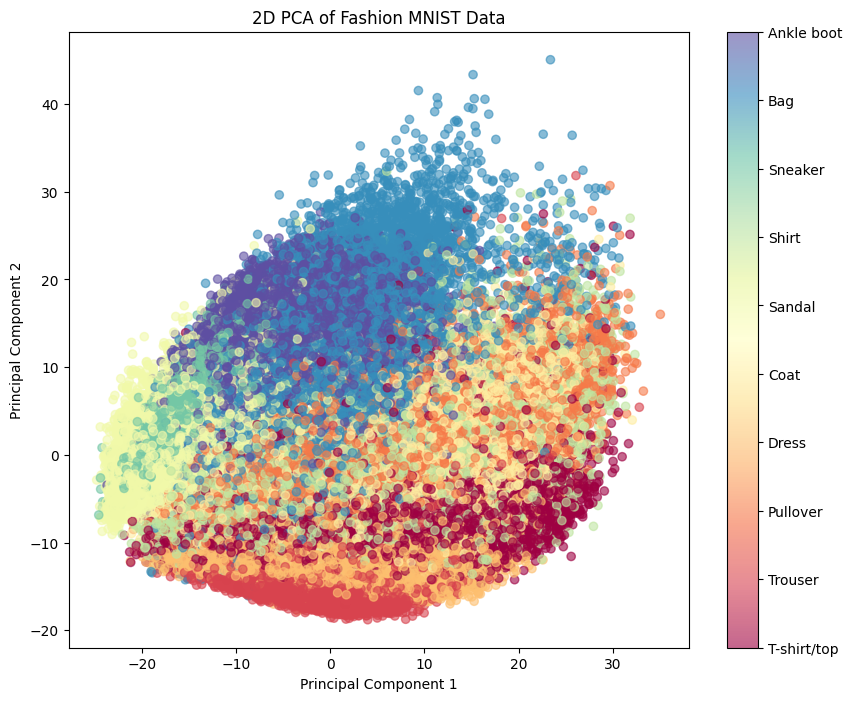

In [6]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=[list(label_map).index(int(label)) for label in labels], cmap='Spectral', alpha=0.6)

cbar = plt.colorbar(scatter, ticks=np.arange(len(label_map)))
cbar.ax.set_yticklabels(list(label_map.values())) 

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Fashion MNIST Data')
plt.show()

#### Part 1.3

Show how much variance ratio is explained by the reduced dimension.

In [12]:
variance_ratio = pca.explained_variance_ratio_
print(f"Variance ratio after reducing dimensions (PCA) {variance_ratio}")

Variance ratio after reducing dimensions (PCA) [0.22092292 0.14402605]


### Part 2

Another Reduction Method

#### Part 2.1

Apply another reduction method on the features of the Fashion MNIST dataset in 2
dimensions.

In [8]:
svd = TruncatedSVD(n_components=2)
data_2d_svd = svd.fit_transform(data)

#### Part 2.2

Show scatter plot of the reduced dimension. Use separate color for each class of the
data.

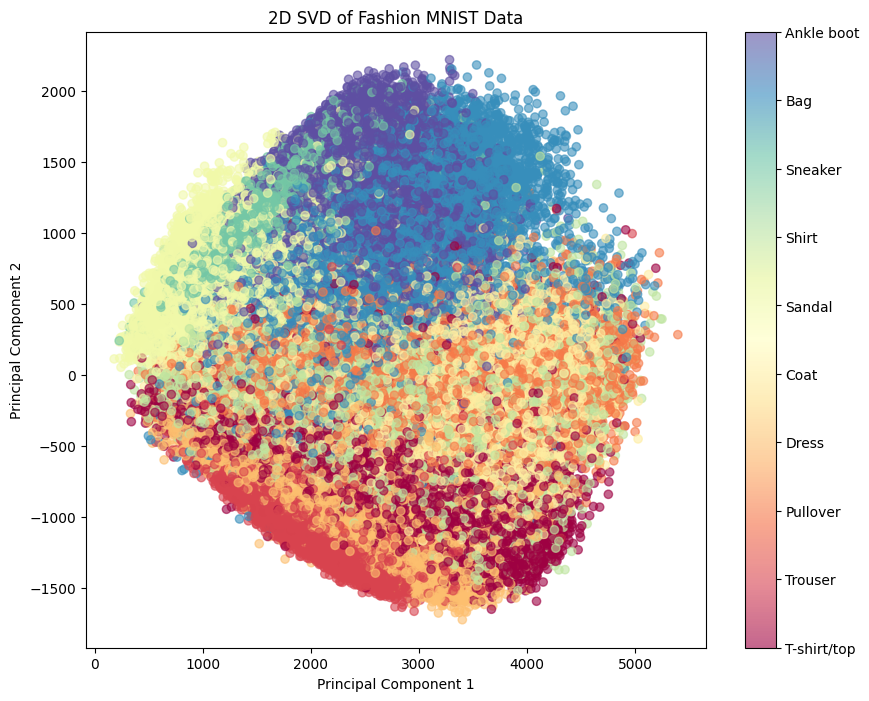

In [9]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_2d_svd[:, 0], data_2d_svd[:, 1], c=[list(label_map).index(int(label)) for label in labels], cmap='Spectral', alpha=0.6)

cbar = plt.colorbar(scatter, ticks=np.arange(len(label_map)))
cbar.ax.set_yticklabels(list(label_map.values())) # Set string labels

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D SVD of Fashion MNIST Data')
plt.show()

#### Part 2.3

Show how much variance ratio is explained by the reduced dimension.

In [11]:
variance_ratio_svd = svd.explained_variance_ratio_
print(f"Variance ratio after reducing dimensions (SVD) {variance_ratio_svd}")

Variance ratio after reducing dimensions (SVD) [0.24899244 0.19291239]


### Part 3

Conceptual Question

#### Part 3.1

Compare the variance ratio explained by the 2-dimensions of the methods you have
used. Which is better?

In the context of Principal Component Analysis (PCA) and Singular Value Decomposition (SVD), the variance ratio signifies the proportion of the dataset's total variance that is captured by each individual component.

To determine which method—PCA or SVD—is better in terms of variance ratio after reducing the dimensions, we need to compare the variance ratios provided for each method:

Variance ratio after reducing dimensions with PCA: [0.22092292, 0.14402605]

Variance ratio after reducing dimensions with SVD: [0.24899244, 0.19291239]

The variance ratio indicates the proportion of the dataset's total variance that each component explains. Therefore, higher values imply that more of the original variance in the dataset is being captured by the components.

Based on these numbers, the SVD method has higher variance ratios for both components compared to PCA. This means that the SVD method captures more of the original variance in the dataset in its two components than PCA does. Therefore, in terms of capturing variance, SVD performs better in this specific instance.

#### Part 3.2

Compare the scatter plot of the two methods after reduction. Which is a better method
for separating the different classes of data?

When comparing scatter plots from dimensionality reduction techniques like PCA and SVD, the separation of different classes in the plot can be a qualitative indicator of the effectiveness of the method for certain tasks, such as clustering or classification.

After Visually comparing the scatter plot we can state that the SVD scatter plot represents a higher degree of seperation between classes as compared to the PCA scatter plot. Hence, SVD performs better than PCA.

#### Part 3.3

What is the primary difference between the two methods? Which method works better
in this case and why?

PCA (Principal Component Analysis) and SVD (Singular Value Decomposition) are both linear algebra methods used for dimensionality reduction.

PCA is best suited for feature reduction where the goal is to reduce the dimensionality of data while retaining as much variance as possible. SVD is a more general matrix factorization method that can be applied to any m×n matrix, used in a broader set of applications beyond just feature reduction.

Based on the scatter plots and variance ratios, the SVD scatter plot seems to show some classes like 'Ankle boot' and 'Bag' as more tightly clustered compared to the PCA plot, which may indicate better class separation. The variance ratio after dimensionality reduction is higher for SVD, suggesting that the SVD components retain more information from the original dataset than the PCA components. Therefore, based on the provided data, SVD might be considered as performing slightly better because it retains more variance and the scatter plot suggests a somewhat clearer separation for certain classes